In [1]:
import numpy as np
import pandas as pd

In [2]:
from bs4 import BeautifulSoup

In [5]:
import json
reports = []
with open("ufodata.json") as f:
    
    for i in f:
        reports.append(json.loads(i))

In [6]:
html = []
for i in xrange(13000):
    html.append(reports[i]["html"])

In [7]:
len(html)

13000

In [10]:
soup = []
for i in html:
    soup.append(BeautifulSoup(i, "html.parser"))

In [11]:
desc = []
for i in xrange(len(soup)):
    if len(soup[i].find_all("font")) == 0:
        continue
    desc.append(soup[i].find_all("font")[3].next)

In [23]:
#print desc[0], len(desc[0])
#for i in range(20): #xrange(len(desc)):
#    print len(desc[i])
    

In [9]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.feature_extraction.text import CountVectorizer
#import gensim
from sklearn.cross_validation import train_test_split
from collections import defaultdict
#from pattern.en import parse
#from pattern.en import pprint
#from pattern.vector import stem, PORTER, LEMMA
from sklearn.feature_extraction import text 
from sklearn.cross_validation import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import MDS
#from gensim import corpora, models, similarities
import re
#import findspark
#findspark.init()
#import pyspark
#from pyspark.sql import SQLContext
import nltk
import pprint
#nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from sklearn.cluster import KMeans


from scipy.cluster.hierarchy import ward, dendrogram

/Users/tajima/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# Due to errors, this section is commented (ST)

ufo_word_count = []
for i in xrange(len(desc)):
    if len(desc[i]) > 1:
        words = desc[i].lower().split()
        ufo_word_count.append(len(words))

In [14]:
max(ufo_word_count)

1024

In [15]:
min(ufo_word_count)

1

In [16]:
np.mean(ufo_word_count)

23.291200740340866

In [17]:
words_500 = filter(lambda i: i > 500, ufo_word_count)

In [18]:
words_above100 = filter(lambda i: i > 100 and i <=500, ufo_word_count)
len(words_above100)

339

In [19]:
words_100 = filter(lambda i: i <= 100, ufo_word_count)


(array([  5.30600000e+03,   3.89000000e+03,   1.36100000e+03,
          6.21000000e+02,   5.38000000e+02,   3.08000000e+02,
          2.41000000e+02,   1.72000000e+02,   1.24000000e+02,
          9.10000000e+01,   5.60000000e+01,   4.30000000e+01,
          3.30000000e+01,   2.90000000e+01,   2.40000000e+01,
          2.10000000e+01,   1.10000000e+01,   1.60000000e+01,
          1.50000000e+01,   9.00000000e+00,   7.00000000e+00,
          8.00000000e+00,   4.00000000e+00,   6.00000000e+00,
          3.00000000e+00,   5.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

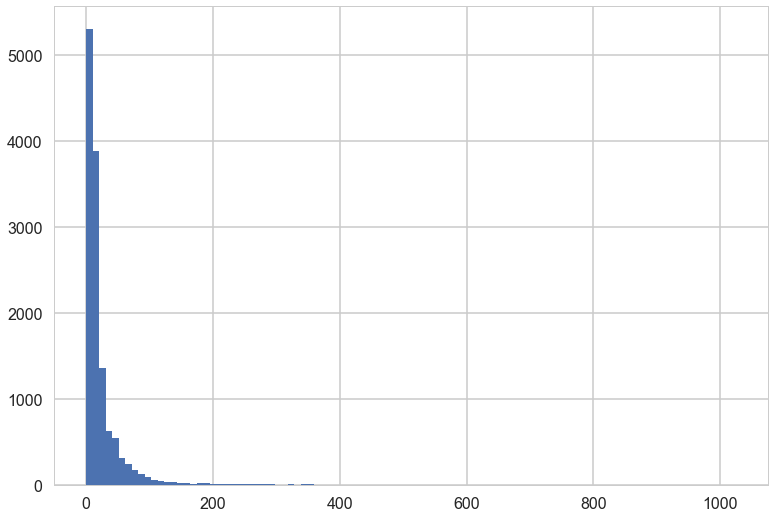

In [20]:
plt.hist(ufo_word_count, bins = 100)

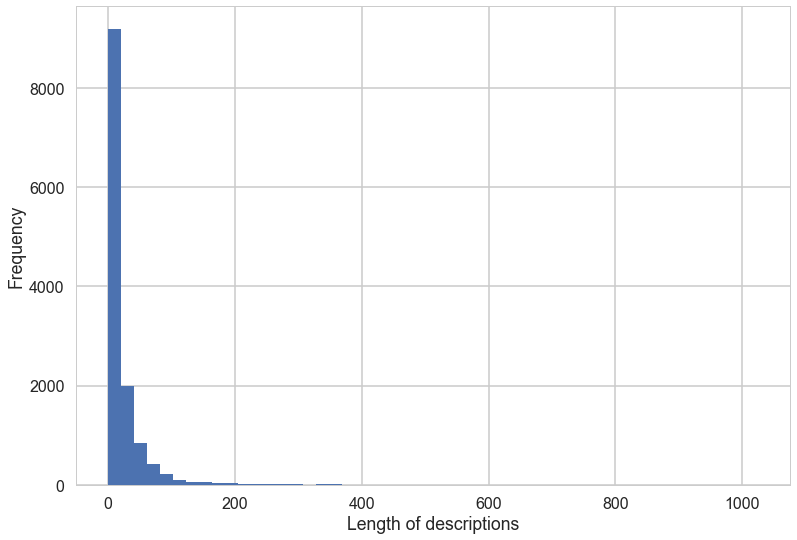

In [21]:
plt.hist(ufo_word_count, bins = 50)
plt.xlabel("Length of descriptions")
plt.ylabel("Frequency")

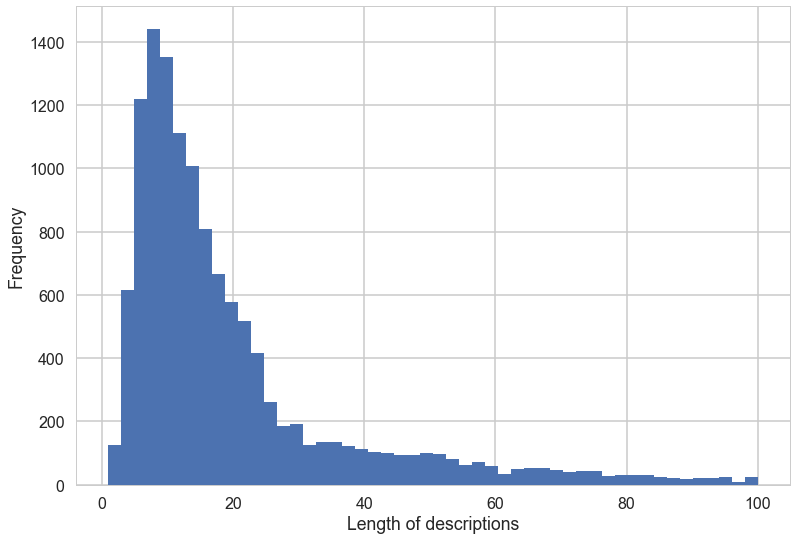

In [22]:
plt.hist(words_100, bins = 50)
plt.xlabel("Length of descriptions")
plt.ylabel("Frequency")

In [23]:
descrip = pd.DataFrame(desc)

In [24]:
descrip.columns = ["Description"]

In [25]:
descrip.head()

,Description
0,Light seen over mountain's east of Camp McGreg...
1,Light in sky stationary. Not a airplane or an...
2,"Flying saucer descends, possibly lands in Nort..."
3,"While letting my dog out, a very bright white ..."
4,A fire ball was moving in the atmosphere while...


In [26]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

In [29]:
# Due to errors, this section is commented (ST)

#---------------------------------------------------------------------------
#TypeError                                 Traceback (most recent call last)
#<ipython-input-24-c9f3fdf61a37> in <module>()
#      3     if len(desc[i]) > 0:
#      4 
#----> 5         words = desc[i].lower().split()
#      6         docs.append([word for word in words if word not in stop])
#
#TypeError: 'NoneType' object is not callable


docs = []
for i in xrange(len(desc)):
    if len(desc[i]) > 1:        
        words = desc[i].lower().split()
        docs.append([word for word in words if word not in stop])


In [30]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

docs_porter = [[porter.stem(word) for word in words]
               for words in docs]


In [31]:
ufo_word_count = []
for i in xrange(len(docs_porter)):
    if len(docs_porter[i]) > 0:
        ufo_word_count.append(len(docs_porter[i]))

In [32]:
vocab_set = set()
[[vocab_set.add(token) for token in tokens] for tokens in docs_porter]
vocab = list(vocab_set)

In [33]:
len(vocab)

17573

In [34]:
len(docs_porter)

12967

In [35]:
words = []
for i in docs_porter:
    for j in i:
        words.append(j)

In [36]:
from collections import Counter

In [37]:
counter = Counter(words)

In [38]:
len(counter.keys())

17573

In [39]:
sorted(counter.items(), key=lambda x:x[1], reverse=True)[:20]

[(u'light', 7064),
 (u'object', 2883),
 (u'move', 2824),
 (u'bright', 2817),
 (u'sky', 2438),
 (u'white', 1704),
 (u'look', 1642),
 (u'saw', 1641),
 (u'like', 1640),
 (u'red', 1596),
 (u'orang', 1488),
 (u'shape', 1443),
 (u'fli', 1342),
 (u'one', 1222),
 (u'seen', 1157),
 (u'sky.', 1106),
 (u'flash', 1041),
 (u'two', 997),
 (u'hover', 967),
 (u'craft', 944)]

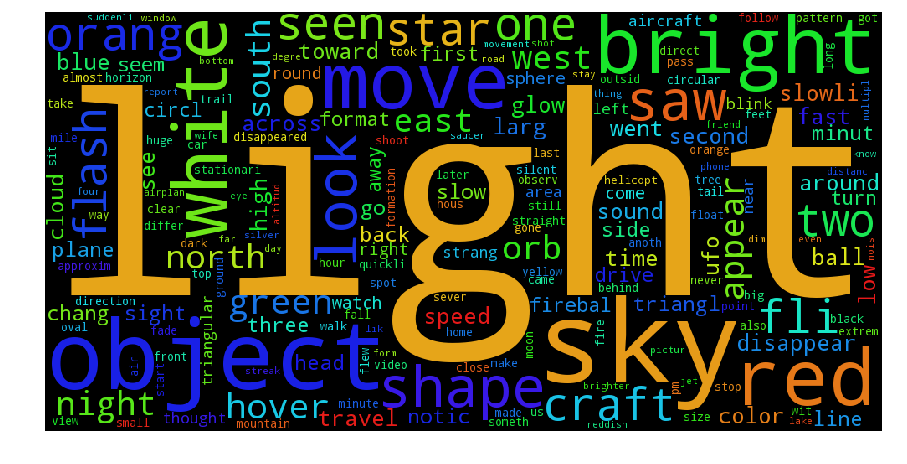

In [40]:
from wordcloud import WordCloud #, STOPWORDS
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)

plt.axis("off")
plt.show()

In [41]:
vectorizer = CountVectorizer(min_df=2, ngram_range=(2,2), stop_words='english')

In [42]:
sparse_matrix = vectorizer.fit_transform(words)

In [43]:
features = vectorizer.get_feature_names()

In [44]:
from nltk.util import ngrams

In [45]:
bigrams = ngrams(words,2)
trigrams = ngrams(words,3)

In [46]:
count_b = Counter(bigrams)

In [47]:
len(count_b)

112024

In [48]:
count_t = Counter(trigrams)

In [49]:
count_t

Counter({(u'3', u'larg', u'orang'): 1,
         (u'apolog', u'need', u'look'): 1,
         (u'centenni', u'parad', u'-'): 1,
         (u'unusu', u'see', u'larg'): 1,
         (u'behind', u'cloud.', u'bright'): 1,
         (u'huge', u'lights.', u'multipl'): 1,
         (u'dispersed.', u'beam', u'light'): 1,
         (u'could', u'slow', u'motion'): 1,
         (u'north', u'south', u'perfect'): 1,
         (u'notic', u'2', u'high'): 1,
         (u'8', u'year', u'old'): 1,
         (u'saucer-shap', u'object', u'streak'): 1,
         (u'appeared.', u'dark', u'green'): 1,
         (u'cover.', u'light', u'seem'): 1,
         (u'3', u'streak', u'light'): 1,
         (u'video.', u"doesn't", u'look'): 1,
         (u'travel', u'northwest', u'kaukauna,'): 1,
         (u'blow', u'thru', u'smoke.'): 1,
         (u'bright', u'white', u'move'): 1,
         (u'independence.', u'orang', u'orb,'): 1,
         (u'incred', u'speed,', u'hover'): 1,
         (u'approxim', u'11:15pm,', u'head'): 1,
         (

In [50]:
x = sorted(count_t.items(), key=lambda x:x[1], reverse=True)[:20]

In [51]:
y = sorted(count_b.items(), key=lambda x:x[1], reverse=True)[:20]

In [52]:
xxaxis = [k[0] for k in x]

In [53]:
yxaxis = [k[0] for k in y]

In [54]:
xyaxis = [(1.*k[1]/len(count_t))*100 for k in x]

In [55]:
xax = []
for words in xxaxis:
    xax.append(' '.join(words)) 

In [56]:
xax

[u'bright white light',
 u'bright red light',
 u'bright orang light',
 u'move across sky',
 u'white light move',
 u'seen anyth like',
 u'never seen anyth',
 u'orang light move',
 u'light move slowli',
 u'light move across',
 u'saw bright light',
 u'bright light sky',
 u'high rate speed',
 u'bright light move',
 u'red green light',
 u'light look like',
 u'star like object',
 u'high rate speed.',
 u'cigar shape object',
 u'look like star']

In [57]:
yax = []
for words in yxaxis:
    yax.append(' '.join(words)) 

In [58]:
yax

[u'white light',
 u'bright light',
 u'red light',
 u'look like',
 u'light move',
 u'orang light',
 u'bright white',
 u'light sky',
 u'flash light',
 u'across sky',
 u'shape object',
 u'object move',
 u'bright orang',
 u'green light',
 u'ball light',
 u'move slowli',
 u'light appear',
 u'night sky',
 u'light seen',
 u'light hover']

In [59]:
yyaxis = [(1.*k[1]/len(count_b))*100 for k in y]

In [60]:
bigrams = pd.DataFrame(yax)

In [61]:
trigrams = pd.DataFrame(xax)

In [62]:
bigrams["percentage"] = yyaxis

In [63]:
trigrams["percentage"] = xyaxis

In [64]:
bigrams.columns = ["bigrams", "percentage"]

In [65]:
trigrams.columns = ["trigrams", "percentage"]

In [66]:
bigrams_to_plot = bigrams[:15]

In [67]:
trigrams_to_plot = trigrams[:15]

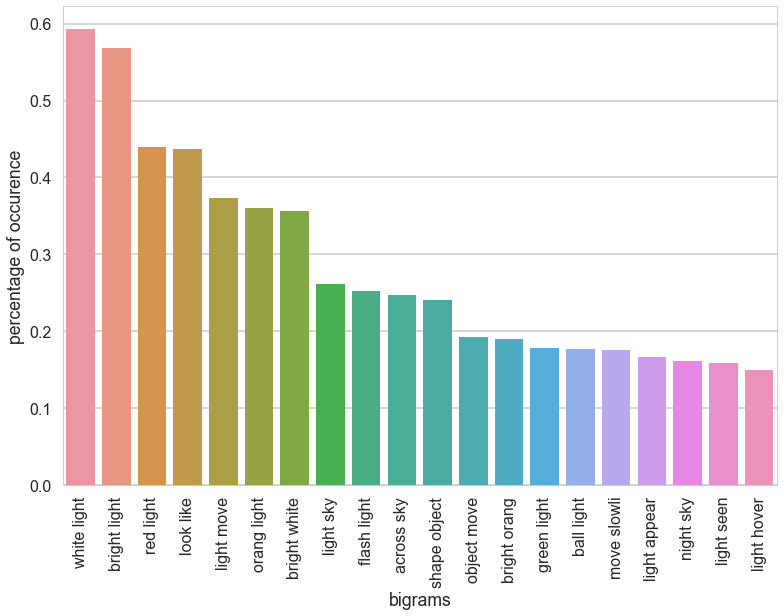

In [71]:
sns.barplot(x="bigrams", y="percentage", data=bigrams);
# can specify color='b'

plt.xticks(rotation = "vertical")
plt.ylabel("percentage of occurence")

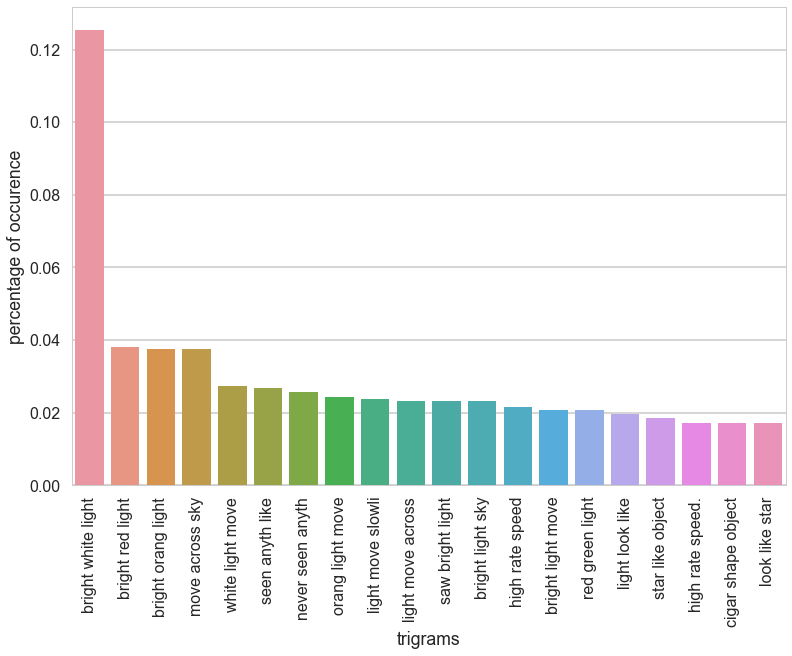

In [69]:
sns.barplot(x="trigrams", y="percentage",  data=trigrams);
plt.xticks(rotation = "vertical")
plt.ylabel("percentage of occurence")